In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import torch.backends
from torch.nn import Module, Linear, ReLU
from torch.optim import SGD
from torch.nn import MSELoss

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()
print(device)

cuda


(array([ 16.,  77., 194., 178.,  32.,  32., 123., 199., 129.,  20.]),
 array([-0.54231214, -0.43677528, -0.33123842, -0.22570156, -0.1201647 ,
        -0.01462784,  0.09090902,  0.19644588,  0.30198273,  0.40751959,
         0.51305645]),
 <BarContainer object of 10 artists>)

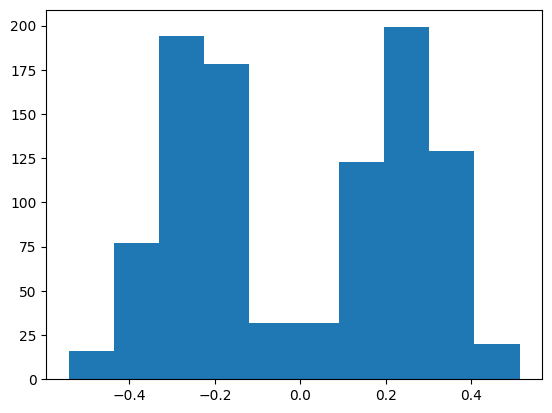

In [ ]:
'''N=500
mu, sigma = -0.25, 0.1
mu2, sigma2 = 0.25, 0.1
X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
eps_b = np.concatenate([X1, X2])
plt.hist(eps_b)'''

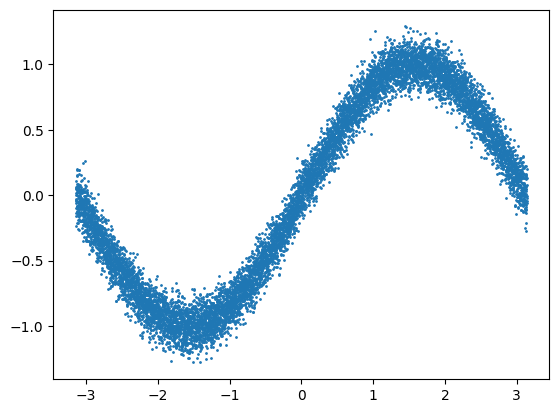

In [ ]:
# Generate Data
f = np.sin

x = np.linspace(- np.pi, np.pi, 10000)
eps = np.random.normal(0, 0.1, 10000)
#eps_beta = np.random.beta(0.001, 0.001, 10000)
#eps_beta2 = np.random.beta(0.5, 0.5, 10000)

#y_b = f(x) + eps_b
y = f(x) + eps
#y_beta = f(x) + eps_beta
#y_beta2 = f(x) + eps_beta2


plt.scatter(x, y, s=1)
#plt.scatter(x, y_b, s =1, color = "red")
#plt.scatter(x, y_beta, s =1, color = "y")
#plt.scatter(x, y_beta2, s =1, color = "purple")
plt.show()

In [ ]:
x_train = x
y_train = y
# Create Data Set
x = torch.tensor(x_train, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 500 #change this
data = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
# Train Model
class NNModel(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NNModel, self).__init__()
        self.linear1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        return out

In [ ]:
fhat = NNModel(1, 40, 1).to(device)

# Initialize weights to be close to 0
for param in fhat.parameters():
    param.data.normal_(0, 0.01)
# Training Loop
optimizer = SGD(fhat.parameters(), lr=0.01)
regularization = 0
criterion = MSELoss()
epochs = 1000

for epoch in range(epochs):
    for x, y in loader:
        optimizer.zero_grad()
        yhat = fhat(x)
        loss = criterion(yhat, y) + regularization * (torch.sum(fhat.linear1.weight ** 2) + torch.sum(fhat.linear2.weight ** 2))
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, loss.item()))

Epoch: 0, Loss: 0.487687
Epoch: 100, Loss: 0.147788
Epoch: 200, Loss: 0.094812
Epoch: 300, Loss: 0.021874
Epoch: 400, Loss: 0.013483
Epoch: 500, Loss: 0.013966
Epoch: 600, Loss: 0.011893
Epoch: 700, Loss: 0.010352
Epoch: 800, Loss: 0.010818
Epoch: 900, Loss: 0.010534


In [ ]:
device

device(type='cuda')

Beta 0.001, 0.001

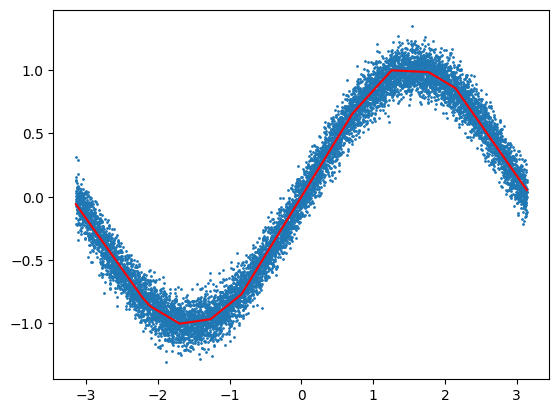

In [ ]:
#batch_size=500
#40 neuron width
dom = np.linspace(-np.pi, np.pi, 10000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()
ys = f(dom)

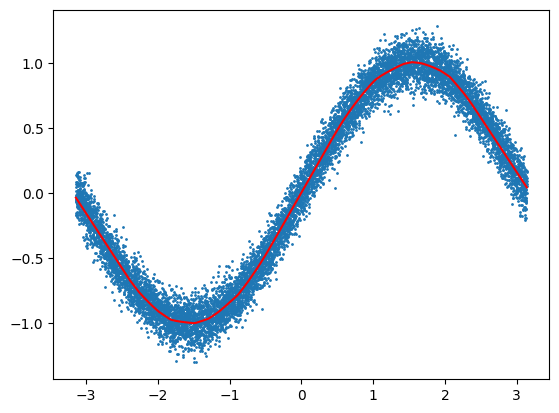

In [ ]:
#10000 neuron width
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()
ys = f(dom)

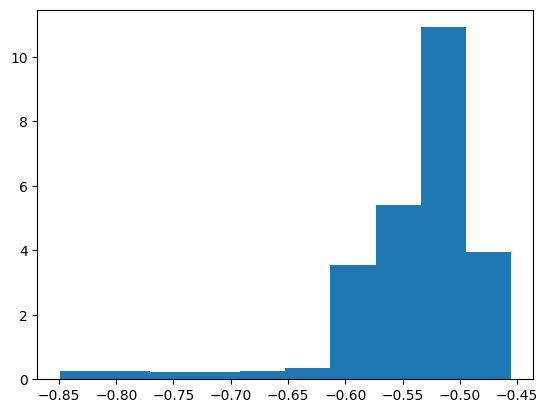

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.show()

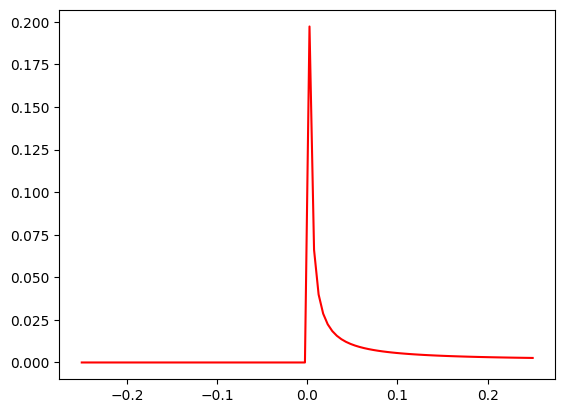

In [ ]:
plt.plot(z, stats.beta.pdf(z, 0.001, 0.001), color="red")

Beta 0.5, 0.5

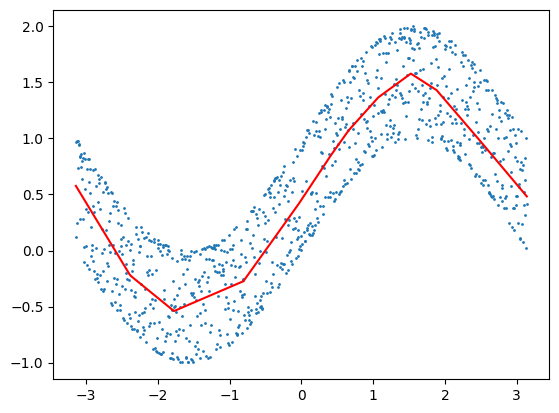

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()
ys = f(dom)

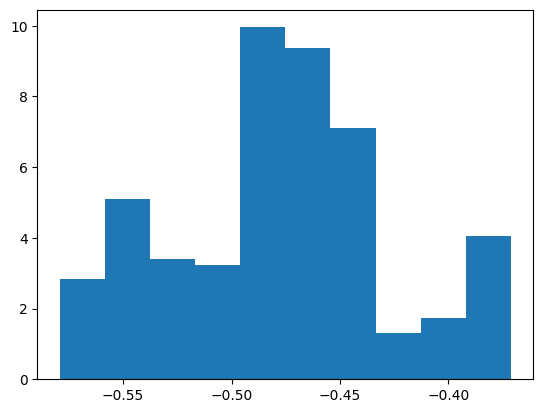

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.show()

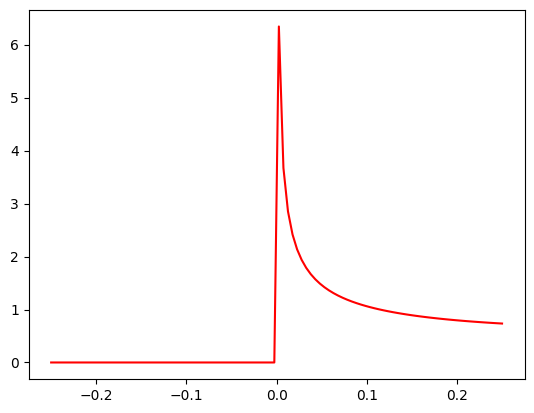

In [ ]:
plt.plot(z, stats.beta.pdf(z, 0.5, 0.5), color="red")

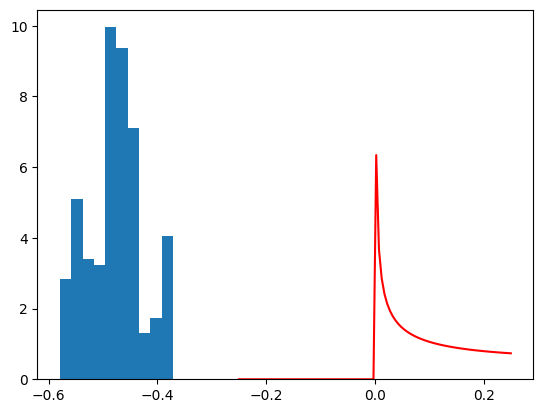

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.plot(z, stats.beta.pdf(z, 0.5, 0.5), color="red")
plt.show()

# Double descent

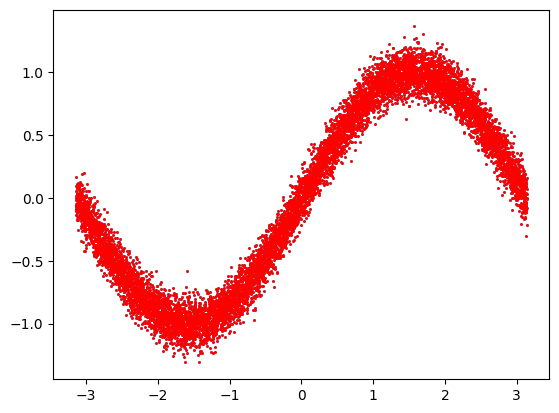

In [ ]:
f = np.sin
x = np.linspace(- np.pi, np.pi, 10000)
eps = np.random.normal(0, 0.1, 10000)
y = f(x) + eps

plt.scatter(x, y, s=1)
plt.scatter(x, y, s =1, color = "red")

# 2 layer

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cuda


In [ ]:
network_width = [1,2,3,4,5,6,8,10,20]
loss_width = []
iter = 10
test = []
#network_width = [1]
torch.seed()
for width in network_width:
  loss_mean = 0
  
  for i in range(iter):
    torch.seed()
    fhat = NNModel(1, width, 1).to(device)

    # Initialize weights to be close to 0
    for param in fhat.parameters():
        param.data.normal_(0, 0.1)
    # Training Loop
    optimizer = SGD(fhat.parameters(), lr=0.01)
    regularization = 0
    criterion = MSELoss()
    epochs = 500

    for epoch in range(epochs):
        for x, y in loader:
            optimizer.zero_grad()
            yhat = fhat(x)
            loss = criterion(yhat, y) + regularization * (torch.sum(fhat.linear1.weight ** 2) + torch.sum(fhat.linear2.weight ** 2))
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, Loss: %f" % (epoch, loss.item()))
    
    #Append loss reached at epoch 1000
    loss_mean += loss.item()/iter
    test.append(loss.item())
    if i == iter - 1:
      loss_width.append(loss_mean)
      np.save("/content/drive/MyDrive/Neural_Nets/Double_Descent/loss_width_var0.1.npy", np.array(loss_width))
    print("***",width,"|",i)
  

Epoch: 0, Loss: 0.520557
Epoch: 100, Loss: 0.495458
Epoch: 200, Loss: 0.510750
Epoch: 300, Loss: 0.509933
Epoch: 400, Loss: 0.510282
*** 1 | 0
Epoch: 0, Loss: 0.531810
Epoch: 100, Loss: 0.521855
Epoch: 200, Loss: 0.528431
Epoch: 300, Loss: 0.530025
Epoch: 400, Loss: 0.510452
*** 1 | 1
Epoch: 0, Loss: 0.529308
Epoch: 100, Loss: 0.155149
Epoch: 200, Loss: 0.171364
Epoch: 300, Loss: 0.165455
Epoch: 400, Loss: 0.175094
*** 1 | 2
Epoch: 0, Loss: 0.501579
Epoch: 100, Loss: 0.178786
Epoch: 200, Loss: 0.164178
Epoch: 300, Loss: 0.171271
Epoch: 400, Loss: 0.176128
*** 1 | 3
Epoch: 0, Loss: 0.508103
Epoch: 100, Loss: 0.534416
Epoch: 200, Loss: 0.491301
Epoch: 300, Loss: 0.500483
Epoch: 400, Loss: 0.513768
*** 1 | 4
Epoch: 0, Loss: 0.531647
Epoch: 100, Loss: 0.189536
Epoch: 200, Loss: 0.165583
Epoch: 300, Loss: 0.183444
Epoch: 400, Loss: 0.180436
*** 1 | 5
Epoch: 0, Loss: 0.501877
Epoch: 100, Loss: 0.171147
Epoch: 200, Loss: 0.178041
Epoch: 300, Loss: 0.165716
Epoch: 400, Loss: 0.176281
*** 1 | 6

In [ ]:
loss_width_1 = np.load("/content/drive/MyDrive/Neural_Nets/Double_Descent/loss_width_1.npy")
loss_width_2_6 = np.load("/content/drive/MyDrive/Neural_Nets/Double_Descent/loss_width_2-6.npy")
loss_width_8 = np.load("/content/drive/MyDrive/Neural_Nets/Double_Descent/loss_width_8.npy")
loss_width_10_20 = np.load("/content/drive/MyDrive/Neural_Nets/Double_Descent/loss_width_10_20.npy")

In [ ]:
loss_width_1 = list(loss_width_1)
loss_width_2_6 = list(loss_width_2_6)
loss_width_8 = list(loss_width_8)
loss_width_10_20 = list(loss_width_10_20)

In [ ]:
network_width_iter20 = [1,2,3,4,5,6,8,10,20]
loss_width = [loss_width_1,loss_width_2_6,loss_width_8,loss_width_10_20]

In [ ]:
loss_width_iter20 = []
for seq in loss_width:
  for i in range(len(seq)):
    loss_width_iter20.append(seq[i])

In [ ]:
loss_width_iter20

[0.23416392877697945,
 0.1830640122294426,
 0.10715639195404948,
 0.0955841689836234,
 0.061973263416439286,
 0.06962326457723975,
 0.06295845690183341,
 0.026951574441045525,
 0.011620721500366925]

Text(0, 0.5, 'Average test error')

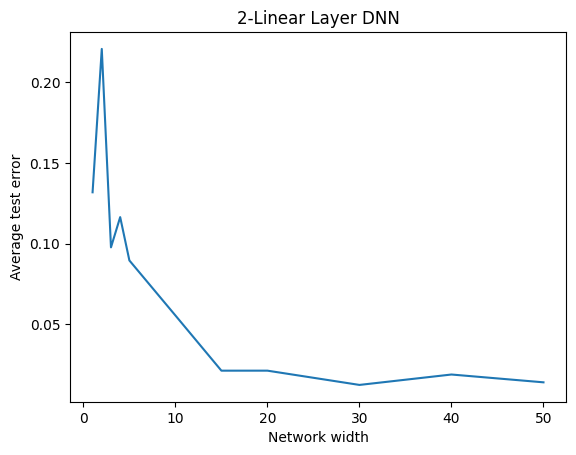

In [ ]:
#network_width = [1,2,3,4,5,10,15,20,30,40,50], 5 iters, 1000
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

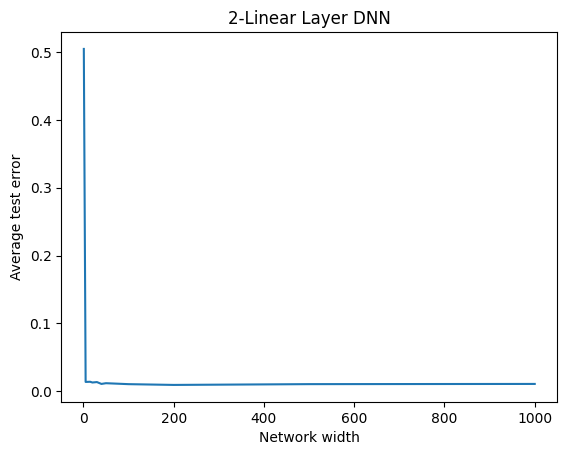

In [ ]:
#network_width = [1,5,10,15,20,30,40,50,100,200,500,1000], 1 iter, 10000
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

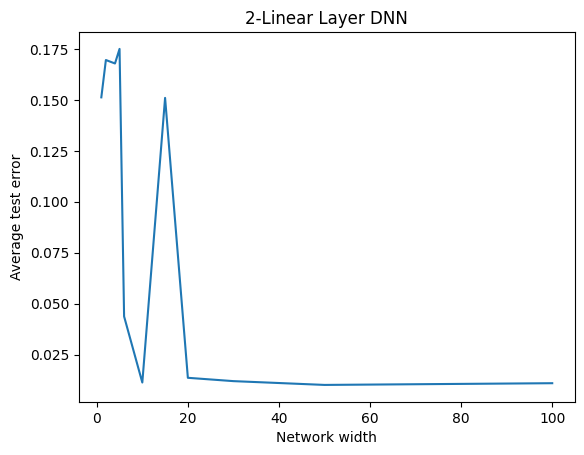

In [ ]:
#network_width = [1,2,4,5,6,10,15,20,30,50,100], 1 iter, 10000
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

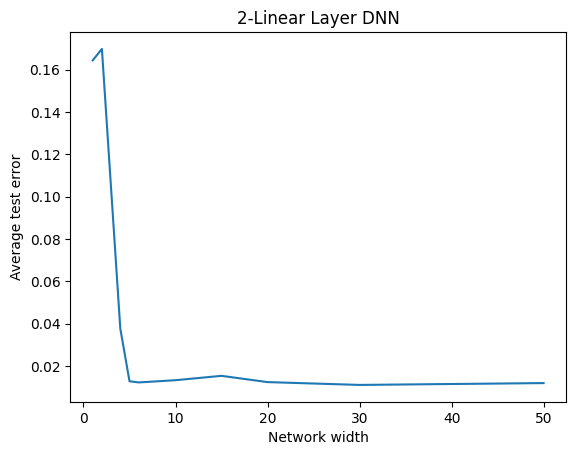

In [ ]:
#network_width = [1,2,4,5,6,10,15,20,30,50], 1 iter, 10000
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

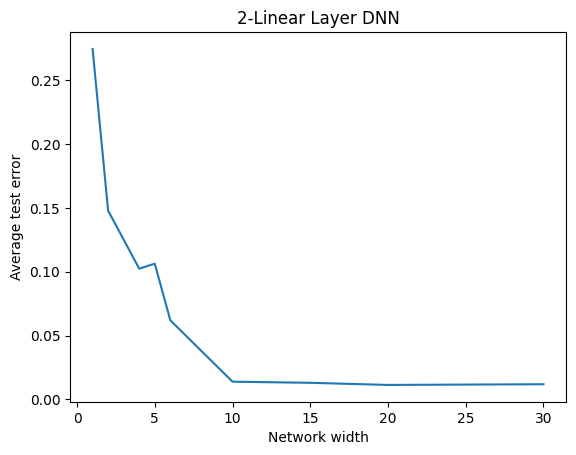

In [ ]:
#network_width = [1,2,4,5,6,10,15,20,30], 3 iter, 10000
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

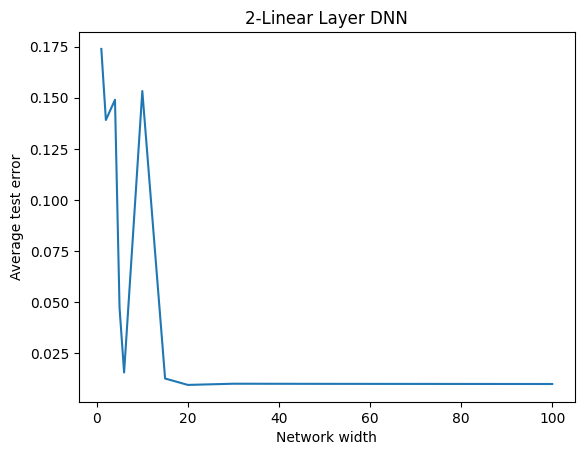

In [ ]:
#network_width = [1,2,4,5,6,10,15,20,30,50,100], 1 iter, 10000, AGAIN
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

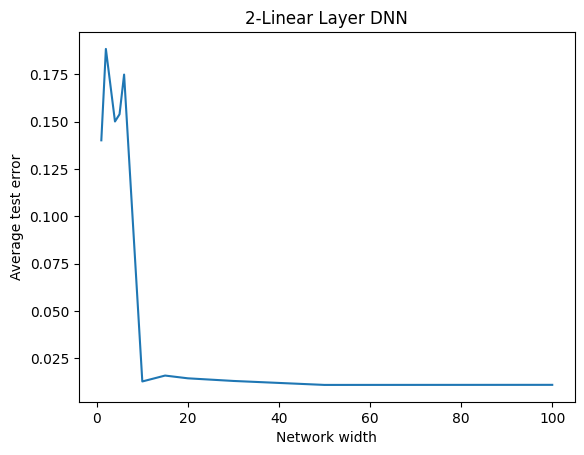

In [ ]:
#network_width = [1,2,4,5,6,10,15,20,30,50,100], 1 iter, 10000, AGAIN!!
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

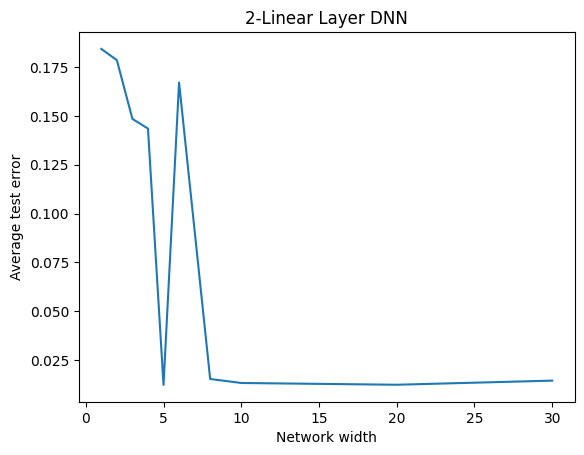

In [ ]:
#network_width = [1,2,3,4,5,6,8,10,20,30], 1 iter, 10000 (zoom in to early network width)
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

Text(0, 0.5, 'Average test error')

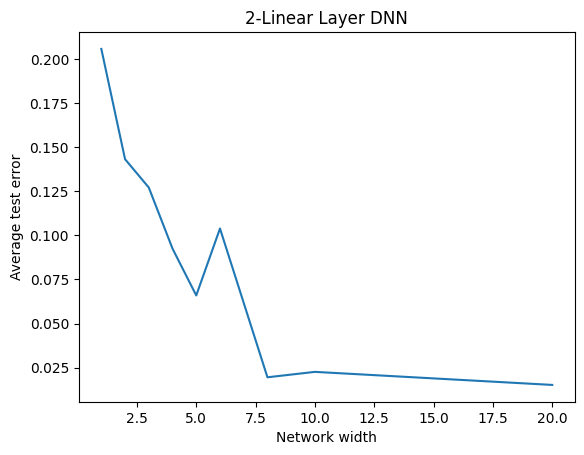

In [ ]:
#network_width = [1,2,3,4,5,6,8,10,20], 10 iter, 10000 (zoom in to early network width) epsilon variance 0.05
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error") 

In [ ]:
#network_width = [1,2,3,4,5,6,8,10,20], 10 iter, 10000 (zoom in to early network width) epsilon variance 0.1
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error") 

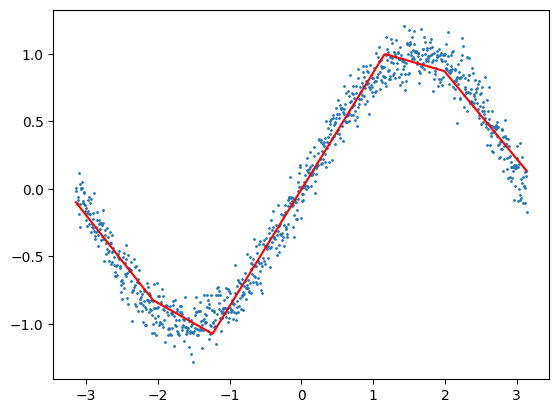

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()